Importing necessary libraries

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

Loading and exploring the dataset

In [3]:
# Load the dataset 
columns = ["id", "diagnosis"] + [f"feature{i}" for i in range(1, 31)]

df = pd.read_csv("wdbc.data", header=None, names=columns)

# Checking values in columns
print(df.head())

         id diagnosis  feature1  feature2  feature3  feature4  feature5  \
0    842302         M     17.99     10.38    122.80    1001.0   0.11840   
1    842517         M     20.57     17.77    132.90    1326.0   0.08474   
2  84300903         M     19.69     21.25    130.00    1203.0   0.10960   
3  84348301         M     11.42     20.38     77.58     386.1   0.14250   
4  84358402         M     20.29     14.34    135.10    1297.0   0.10030   

   feature6  feature7  feature8  ...  feature21  feature22  feature23  \
0   0.27760    0.3001   0.14710  ...      25.38      17.33     184.60   
1   0.07864    0.0869   0.07017  ...      24.99      23.41     158.80   
2   0.15990    0.1974   0.12790  ...      23.57      25.53     152.50   
3   0.28390    0.2414   0.10520  ...      14.91      26.50      98.87   
4   0.13280    0.1980   0.10430  ...      22.54      16.67     152.20   

   feature24  feature25  feature26  feature27  feature28  feature29  feature30  
0     2019.0     0.1622     0

Preprocessing the data

In [4]:
# Drop unnecessary columns
df = df.drop("id", axis=1)

# Map diagnosis to binary values (Malignant: 1, Benign: 0)
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# Separate features and target
X = df.drop("diagnosis", axis=1)
y = df['diagnosis']

Spliting data into Training and Testing Sets

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Training a Machine Learning Model(Decision Tree)

In [12]:

# Create and train the Decision Tree model
decision_tree_model = DecisionTreeClassifier(random_state=45)
decision_tree_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=45)

Evaluating the model

Accuracy: 0.9385964912280702


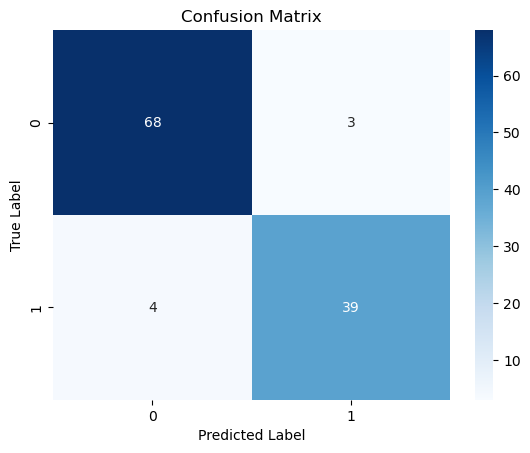

In [13]:
# Make predictions on the test set
y_pred = decision_tree_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()